### Multi Linear Regression

#### Problem Statement

Dataset --> winequality-red.csv

Predict the Quality of Wine.

In [1]:
#Importing the Required Labaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/winequality-red.csv")
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Checking NA Values
Dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Inference: There are No NA Value Present in the Dataset.

#### Renaming the Column
Because of Spaces between Column Names

In [4]:
Dataset = Dataset.rename({'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                         'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide',
                          'total sulfur dioxide':'total_sulfur_dioxide'}, axis = 1)
Dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Inference: Now Column Names are Changed

#### Detecting Collinearity -- Two Methods

#### Correlation Matrix -- 1st Method 

In [5]:
#Using corr()
Dataset.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### Scatterplot between variables along with histograms

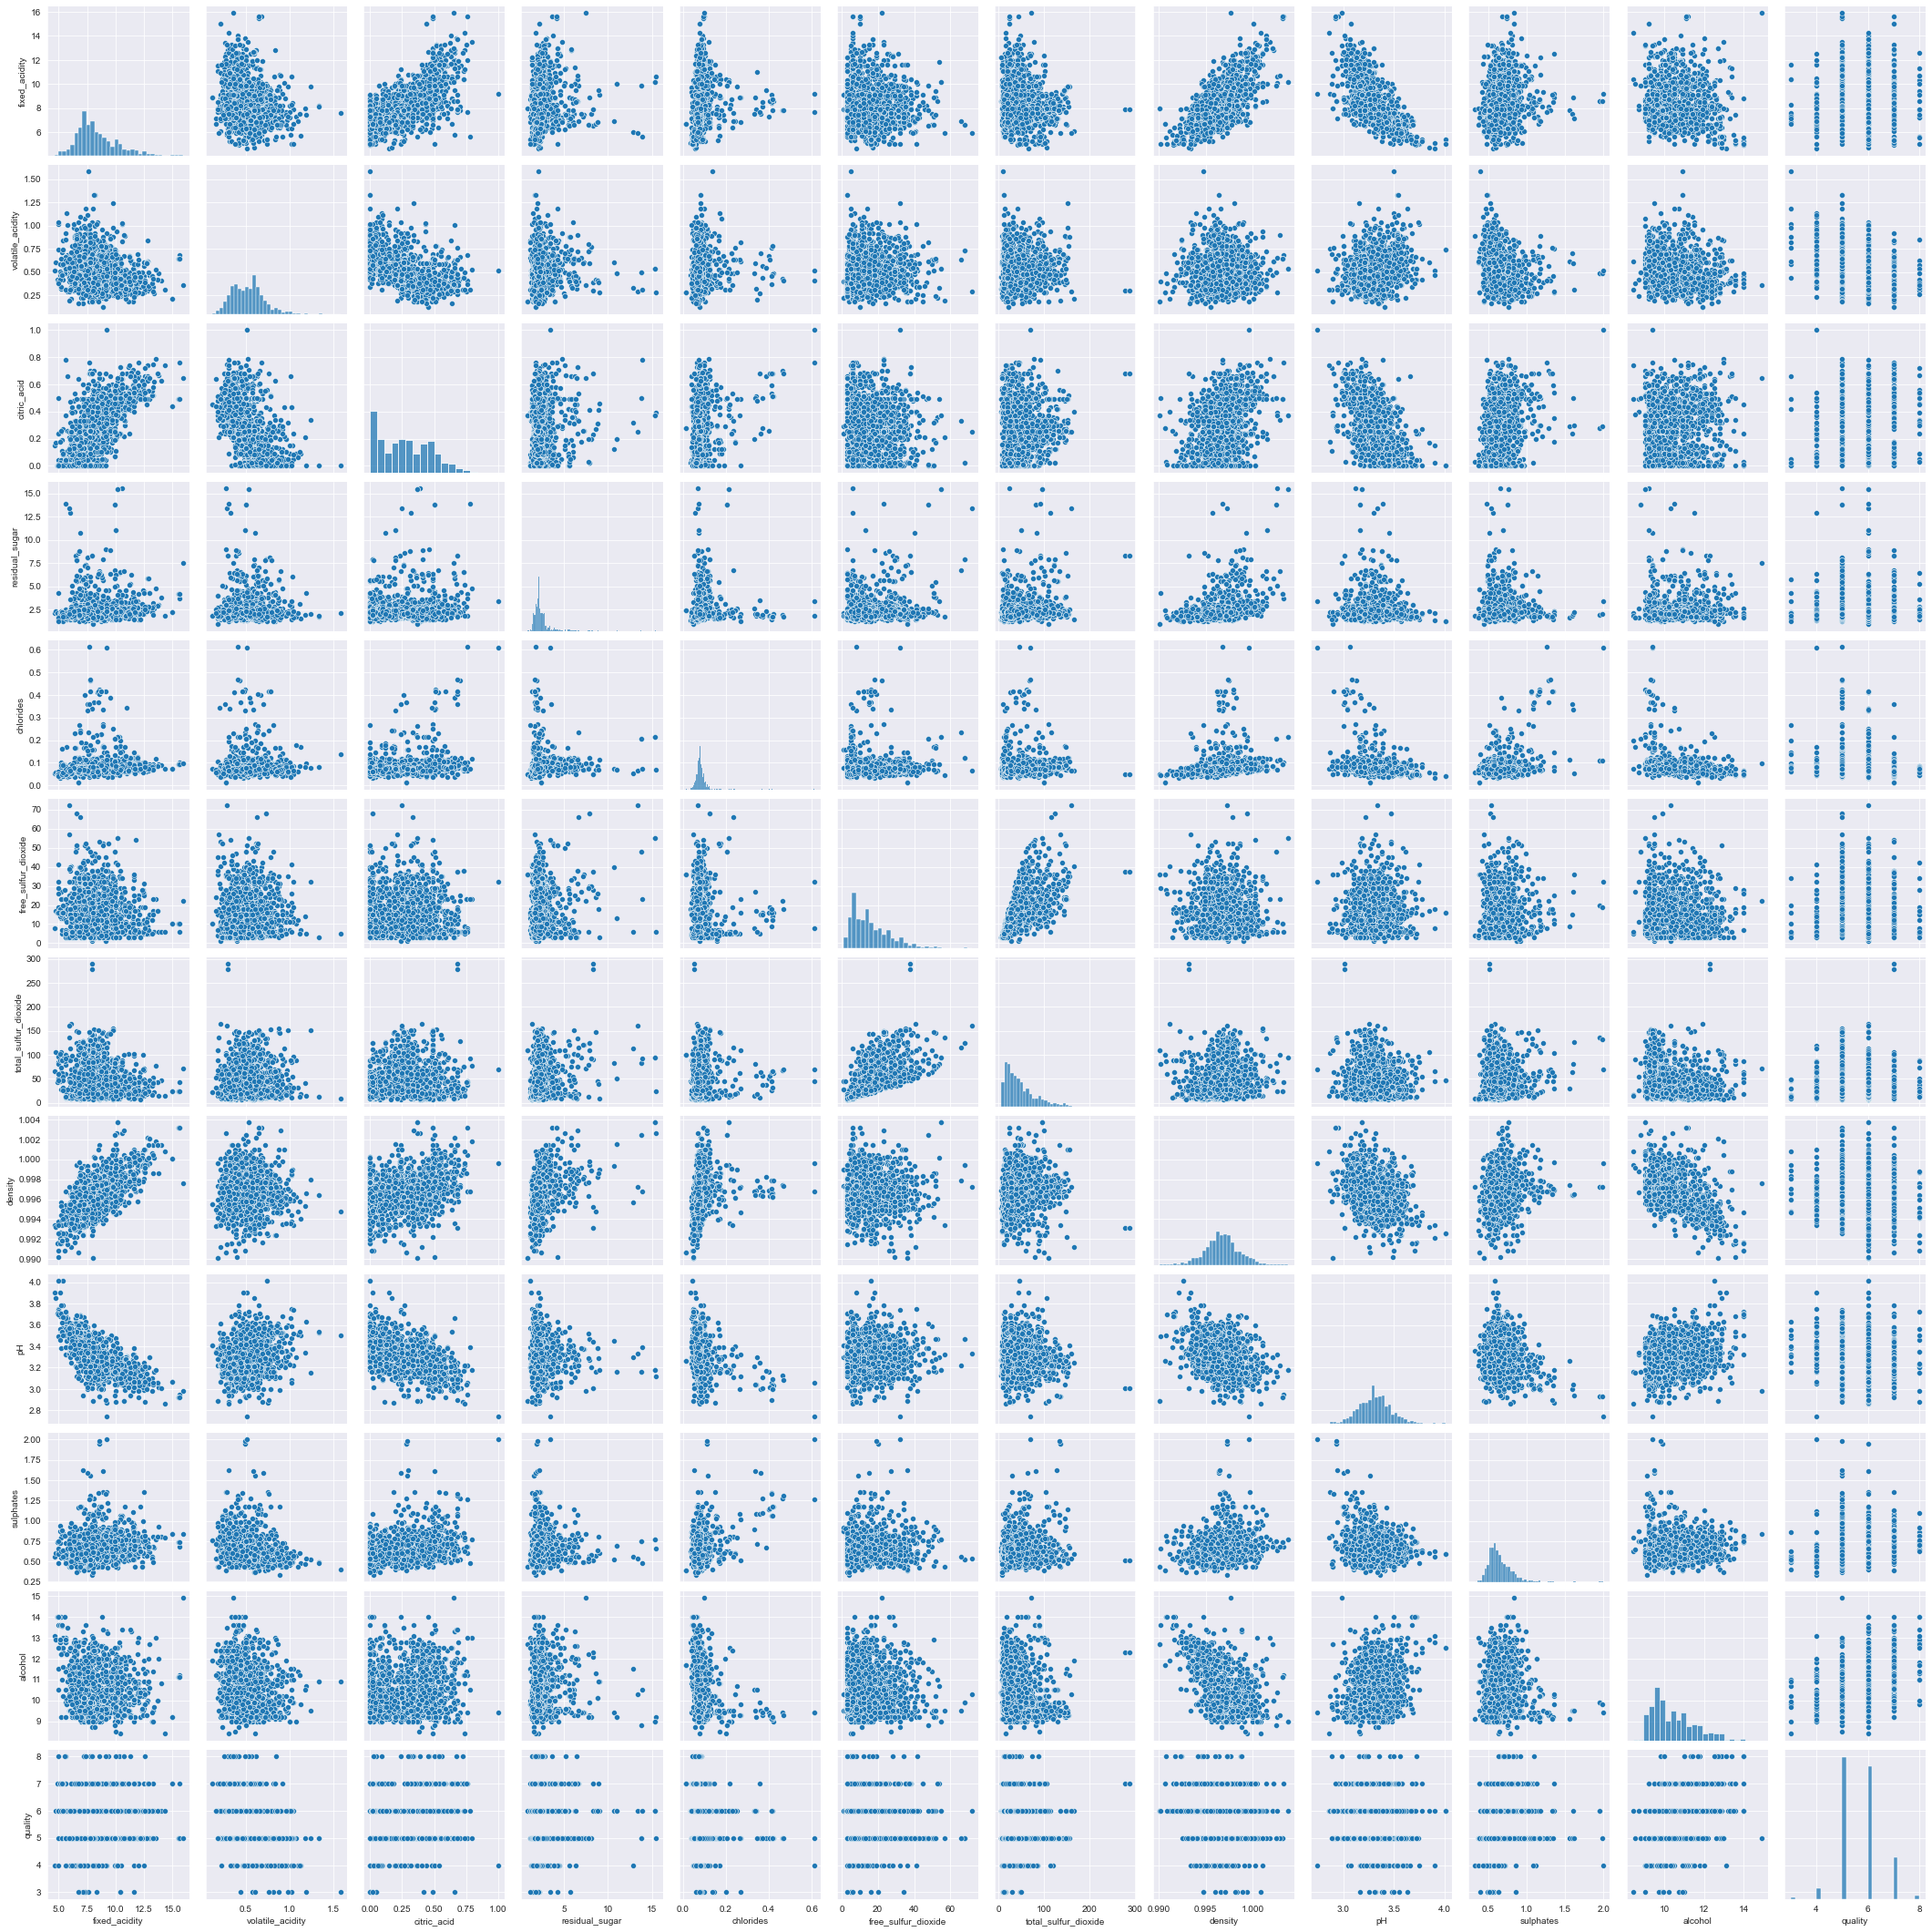

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Dataset)

Inference: All Variable have correlation with the Target variable 'Quality', collinearity between Different Variable cant be Detected From This We Will Go 2nd Method.

#### Preparing a model

In [7]:
#Build the model --1st Model
import statsmodels.formula.api as smf 
model = smf.ols('quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit()

In [8]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept                1.036360
fixed_acidity            0.963083
volatile_acidity        -8.947802
citric_acid             -1.240445
residual_sugar           1.088599
chlorides               -4.470070
free_sulfur_dioxide      2.008635
total_sulfur_dioxide    -4.479830
density                 -0.826565
pH                      -2.158971
sulphates                8.014297
alcohol                 10.429014
dtype: float64 
 P_values is:  
 Intercept               3.001921e-01
fixed_acidity           3.356528e-01
volatile_acidity        9.872361e-19
citric_acid             2.149942e-01
residual_sugar          2.764960e-01
chlorides               8.373953e-06
free_sulfur_dioxide     4.474495e-02
total_sulfur_dioxide    8.004610e-06
density                 4.086079e-01
pH                      3.100189e-02
sulphates               2.127228e-15
alcohol                 1.123029e-24
dtype: float64


#### Hypothesis in MLR

B0 = Beta0 , B1 = Beta1.....B11 = Beta11

H0: B1 = 0, B1--> Slope is Zero Then B1 Variable is not Useful in Predicting

H1: B1 ≠ 0, B1--> Slope is not Zero B1 Variable is  Useful in Predicting

(Like This for All Four Betas)

In [9]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and B1(fixed_acidity) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and B1(fixed_acidity) is Insignificant in Predicting")

if model.pvalues[2] < α:
    print("p_value is:",model.pvalues[2],", Reject H0,Slope is not Zero and B2(volatile_acidity) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[2],", Fail to Reject H0,Slope is Zero and B2(volatile_acidity) is Insignificant in Predicting")

if model.pvalues[3] < α:
    print("p_value is:",model.pvalues[3],", Reject H0,Slope is not Zero and B3(citric_acid) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[3],", Fail to Reject H0,Slope is Zero and B3(citric_acid) is Insignificant in Predicting")
    
if model.pvalues[4] < α:
    print("p_value is:",model.pvalues[4],", Reject H0,Slope is not Zero and B4(residual_sugar) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[4],", Fail to Reject H0,Slope is Zero and B4(residual_sugar) is Insignificant in Predicting")

if model.pvalues[5] < α:
    print("p_value is:",model.pvalues[5],", Reject H0,Slope is not Zero and B5(chlorides) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[5],", Fail to Reject H0,Slope is Zero and B5(chlorides) is Insignificant in Predicting")

if model.pvalues[6] < α:
    print("p_value is:",model.pvalues[6],", Reject H0,Slope is not Zero and B6(free_sulfur_dioxide) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[6],", Fail to Reject H0,Slope is Zero and B6(free_sulfur_dioxide) is Insignificant in Predicting")

if model.pvalues[7] < α:
    print("p_value is:",model.pvalues[7],", Reject H0,Slope is not Zero and B7(total_sulfur_dioxide) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[7],", Fail to Reject H0,Slope is Zero and B7(total_sulfur_dioxide) is Insignificant in Predicting")

if model.pvalues[8] < α:
    print("p_value is:",model.pvalues[8],", Reject H0,Slope is not Zero and B8(density) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[8],", Fail to Reject H0,Slope is Zero and B8(density) is Insignificant in Predicting")

if model.pvalues[9] < α:
    print("p_value is:",model.pvalues[9],", Reject H0,Slope is not Zero and B9(pH) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[9],", Fail to Reject H0,Slope is Zero and B9(pH) is Insignificant in Predicting")

if model.pvalues[10] < α:
    print("p_value is:",model.pvalues[10],", Reject H0,Slope is not Zero and B10(sulphates) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[10],", Fail to Reject H0,Slope is Zero and B10(sulphates) is Insignificant in Predicting")

if model.pvalues[11] < α:
    print("p_value is:",model.pvalues[11],", Reject H0,Slope is not Zero and B11(alcohol) is Significant in Predicting")
else:
    print("p_value is:",model.pvalues[11],", Fail to Reject H0,Slope is Zero and B11(alcohol) is Insignificant in Predicting")


p_value is: 0.33565275227158586 , Fail to Reject H0,Slope is Zero and B1(fixed_acidity) is Insignificant in Predicting
p_value is: 9.872361224134698e-19 , Reject H0,Slope is not Zero and B2(volatile_acidity) is Significant in Predicting
p_value is: 0.21499424607029227 , Fail to Reject H0,Slope is Zero and B3(citric_acid) is Insignificant in Predicting
p_value is: 0.2764959611296655 , Fail to Reject H0,Slope is Zero and B4(residual_sugar) is Insignificant in Predicting
p_value is: 8.373953383610786e-06 , Reject H0,Slope is not Zero and B5(chlorides) is Significant in Predicting
p_value is: 0.044744950773495246 , Reject H0,Slope is not Zero and B6(free_sulfur_dioxide) is Significant in Predicting
p_value is: 8.00460981834084e-06 , Reject H0,Slope is not Zero and B7(total_sulfur_dioxide) is Significant in Predicting
p_value is: 0.4086078971933892 , Fail to Reject H0,Slope is Zero and B8(density) is Insignificant in Predicting
p_value is: 0.031001886193790677 , Reject H0,Slope is not Zero 

In [10]:
#1st Model R_square.
First_R2 = (model.rsquared,model.rsquared_adj,model.aic)
First_R2

(0.36055170303868833, 0.3561194842191707, 3162.2765525826335)

Inference:R_squared is 0.36 & R_squared_adj is 0.35 which is not a good model, and through hypothesis we found out that fixed_acidity, citric_acid, residual_sugar,density are Insignificant to confirm we will do VIF and then the column based on ViF result and built a new model and check R_squared_adj and aic of the new model

#### VIF(Variable inflation Factor) -- 2nd Method 

Checking all Y(input) Variable one by one regressing them with Eachother

Industry Standard ≤ 5 for VIF Value

In [11]:
rsq_fix_acid = smf.ols('fixed_acidity~volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_fix_acid = 1/(1-rsq_fix_acid) 

rsq_vol_acid = smf.ols('volatile_acidity~fixed_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_vol_acid = 1/(1-rsq_vol_acid) 

rsq_cit_acid = smf.ols('citric_acid~fixed_acidity+volatile_acidity+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_cit_acid = 1/(1-rsq_cit_acid) 

rsq_res_sug = smf.ols('residual_sugar~fixed_acidity+volatile_acidity+citric_acid+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_res_sug = 1/(1-rsq_res_sug)

rsq_chlo = smf.ols('chlorides~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_chlo = 1/(1-rsq_chlo) 

rsq_free = smf.ols('free_sulfur_dioxide~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+total_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_free = 1/(1-rsq_free) 

rsq_total = smf.ols('total_sulfur_dioxide~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+density+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_total = 1/(1-rsq_total) 

rsq_den = smf.ols('density~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_den = 1/(1-rsq_den) 

rsq_ph = smf.ols('pH~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+sulphates+alcohol',data=Dataset).fit().rsquared  
vif_ph = 1/(1-rsq_ph) 

rsq_sulp = smf.ols('sulphates~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+alcohol',data=Dataset).fit().rsquared  
vif_sulp = 1/(1-rsq_sulp) 

rsq_alc = smf.ols('alcohol~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates',data=Dataset).fit().rsquared  
vif_alc = 1/(1-rsq_alc)

# Storing vif values in a data frame
d1 = {'Variables':['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol'],
      'VIF':[vif_fix_acid,vif_vol_acid,vif_cit_acid,vif_res_sug,vif_chlo,vif_free,vif_total,vif_den,vif_ph,vif_sulp,vif_alc]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,fixed_acidity,7.767512
1,volatile_acidity,1.789390
2,citric_acid,3.128022
3,residual_sugar,1.702588
4,chlorides,1.481932
5,free_sulfur_dioxide,1.963019
6,total_sulfur_dioxide,2.186813
7,density,6.343760
8,pH,3.329732
9,sulphates,1.429434


Inference: From VIF it is clear Fixed_acidity and density are insignificant as their vif score is greater then 5 so droping them for now and building a New model and compare rsquared_adj and aic

In [12]:
#Dropping fixed_acidity & density column
Dataset1 = Dataset.drop(["fixed_acidity",'density'], axis=1)
Dataset1.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


In [13]:
#Build the model --2nd Model
import statsmodels.formula.api as smf 
model = smf.ols('quality~volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol',data=Dataset1).fit()

In [14]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept               10.103351
volatile_acidity        -9.292180
citric_acid             -1.160092
residual_sugar           0.782094
chlorides               -4.866980
free_sulfur_dioxide      2.128162
total_sulfur_dioxide    -4.889145
pH                      -4.103117
sulphates                8.120605
alcohol                 16.954933
dtype: float64 
 P_values is:  
 Intercept               2.653157e-23
volatile_acidity        4.814452e-20
citric_acid             2.461856e-01
residual_sugar          4.342761e-01
chlorides               1.245714e-06
free_sulfur_dioxide     3.347718e-02
total_sulfur_dioxide    1.115187e-06
pH                      4.282823e-05
sulphates               9.211374e-16
alcohol                 2.139196e-59
dtype: float64


In [15]:
#2nd Model R_square.
Second_R2 = (model.rsquared,model.rsquared_adj,model.aic)
Second_R2

(0.36017280447149036, 0.35654886189140433, 3159.2237431295057)

In [16]:
#Checking Adj_R2 After Dropping fixed_acidity & density column
if First_R2[1]<Second_R2[1]:
    print("2nd Model is Better as its AdjR2",Second_R2[1],"is more then 1st Model AdjR2",First_R2[1])
else:
    print("1st Model is Better as its AdjR2",First_R2[1],"is more then 2nd Model AdjR2",Second_R2[1])

2nd Model is Better as its AdjR2 0.35654886189140433 is more then 1st Model AdjR2 0.3561194842191707


Inference: After Droping fixed_acidity and density adjr2 increased and Aic decreased, So Now lets Drop the remaining columns citric_acid, residual_sugar which were found insignificant through hypothesis 

In [17]:
#Dropping citric_acid, residual_sugar
Dataset2 = Dataset1.drop(['citric_acid', 'residual_sugar'], axis=1)
Dataset2.head()

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


In [18]:
#Build the model --3rd Model
import statsmodels.formula.api as smf 
model = smf.ols('quality~volatile_acidity+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol',data=Dataset2).fit()

In [19]:
#3rd Model R_square.
Third_R2 = (model.rsquared,model.rsquared_adj,model.aic)
Third_R2

(0.35947091587233826, 0.35665274894028687, 3156.9768801278606)

In [20]:
#Checking Adj_R2 After Dropping citric_acid, residual_sugar
if Second_R2[1]<Third_R2[1]:
    print("3rd Model is Better as its AdjR2",Third_R2[1],"is more then 2nd Model AdjR2",Second_R2[1])
else:
    print("2nd Model is Better as its AdjR2",Second_R2[1],"is more then 3rd Model AdjR2",Third_R2[1])

3rd Model is Better as its AdjR2 0.35665274894028687 is more then 2nd Model AdjR2 0.35654886189140433


Inference: After Droping citric_acid, residual_sugar adjr2 increased and Aic decreased of the new model which is 3rd model

### Model Validation Techniques -- 3 Technique

#### Test for Normality of Residuals (Q-Q Plot) -- 1st Technique

Datapoints must be inside Solid red Line or inside the 95% CI

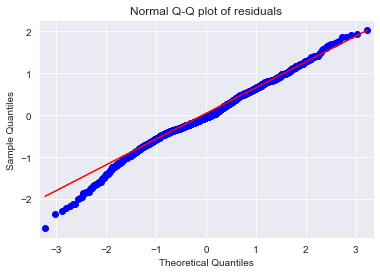

In [21]:
#Building the QQ Plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
#Getting a List of Outliers
list(np.where(model.resid<-2))

[array([  45,  459,  652,  832,  899, 1276, 1478, 1505], dtype=int64)]

Inference: The Given Array is the Outlier if Residual <-2

#### Residual Plot for Homoscedasticity (Fitted VS Residuals, (Ei vsY^) ) --2nd Technique

In [23]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

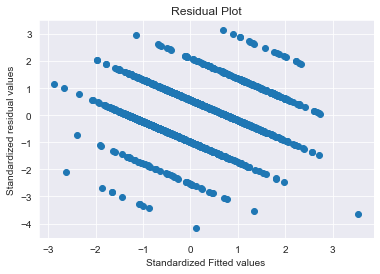

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Inference: A Linear Pattern

#### Residual Vs Regressors -- 3rd Technique (Ei vs Xi)

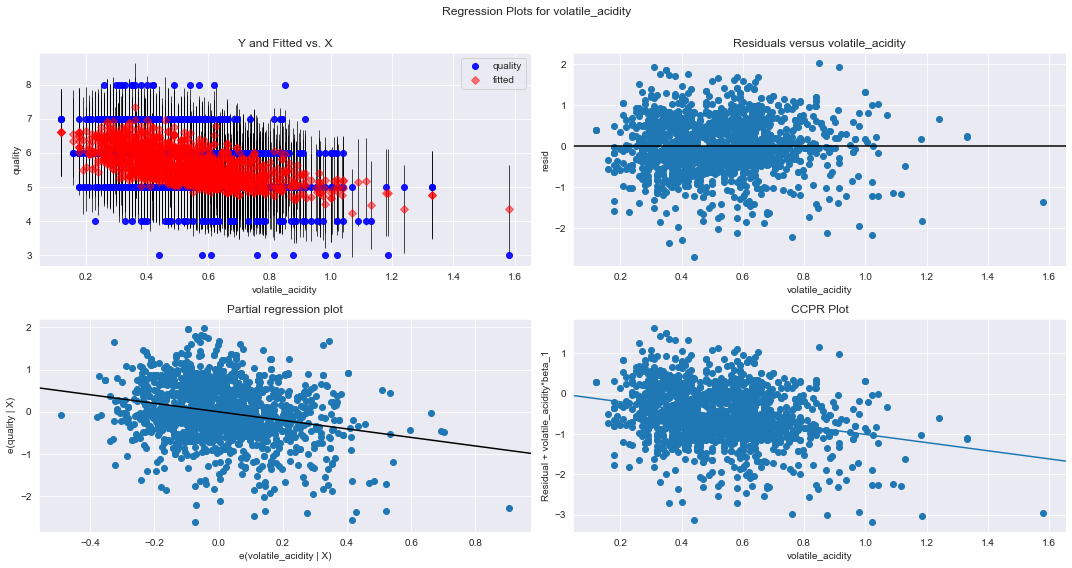

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "volatile_acidity", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means volatile_acidity is Significant

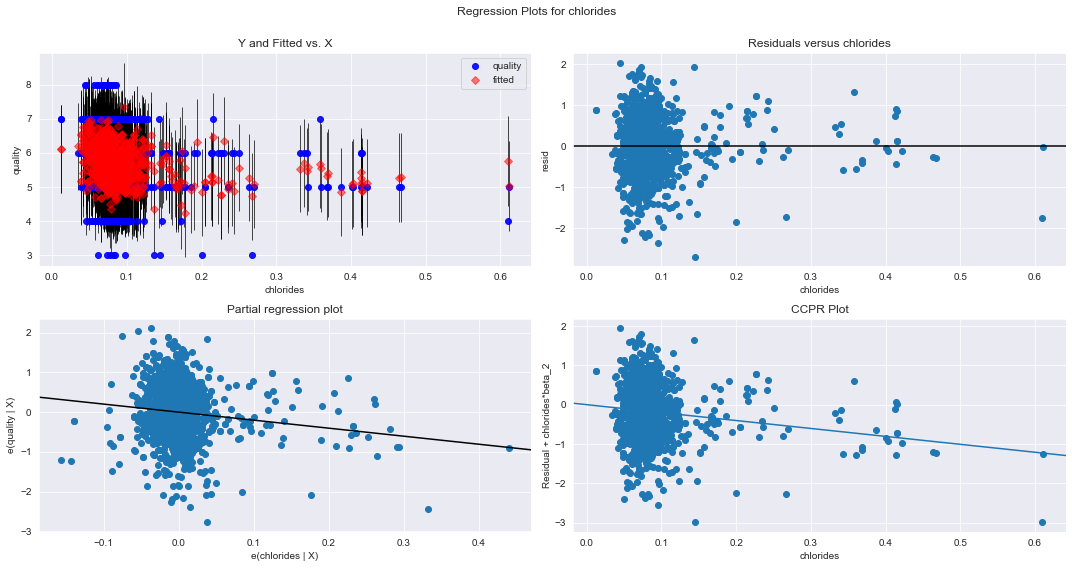

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "chlorides", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means chlorides is Significant

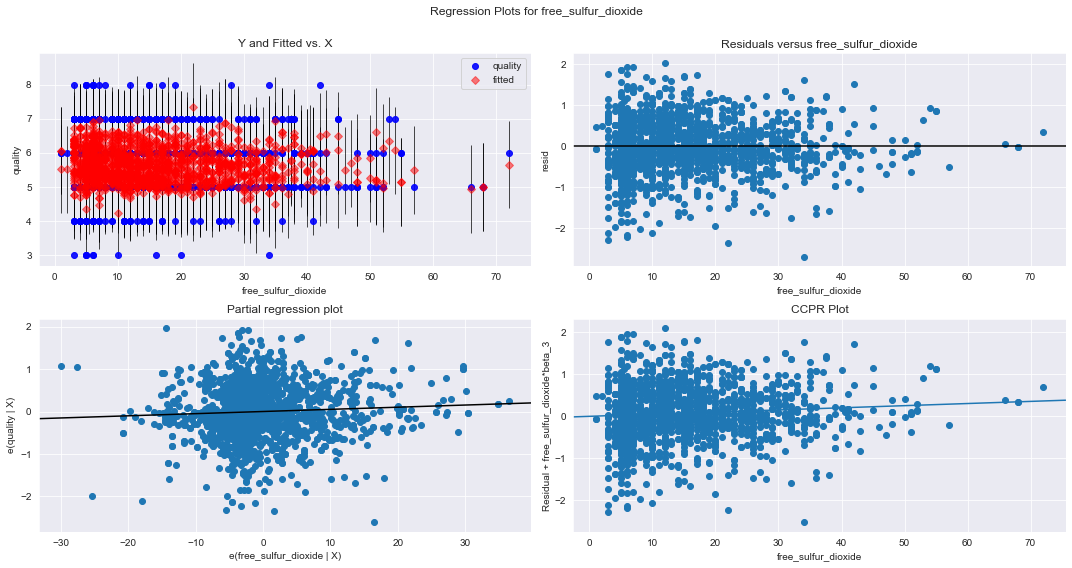

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "free_sulfur_dioxide", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means free_sulfur_dioxide is Significant

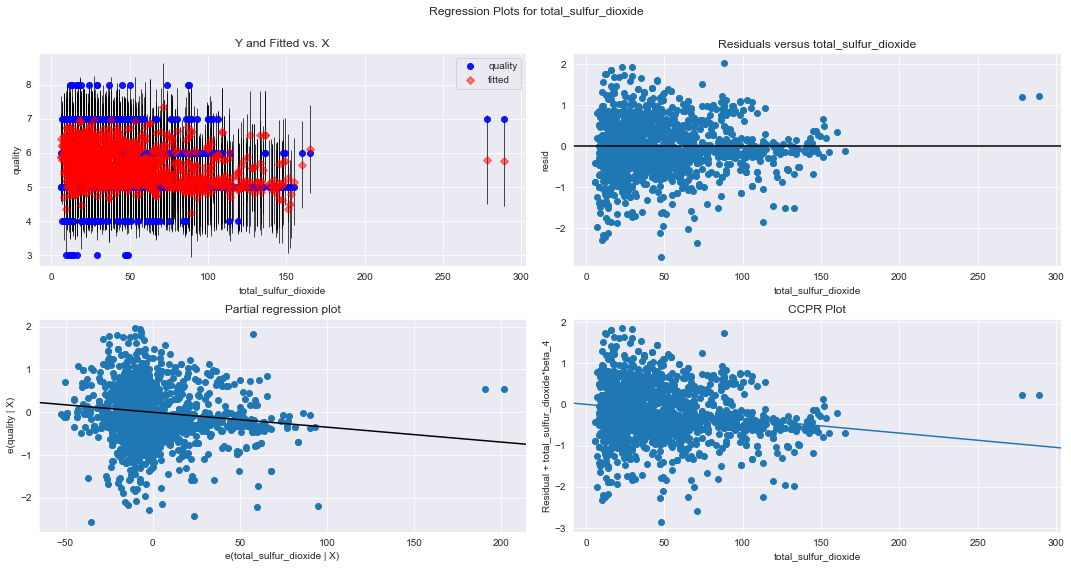

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "total_sulfur_dioxide", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means total_sulfur_dioxide is Significant

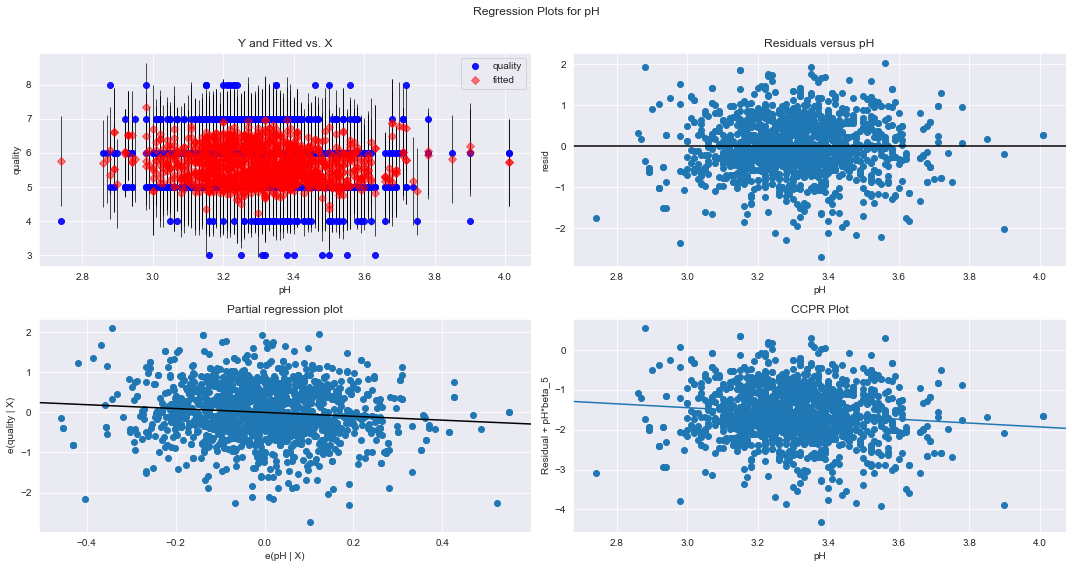

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "pH", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means pH is Significant

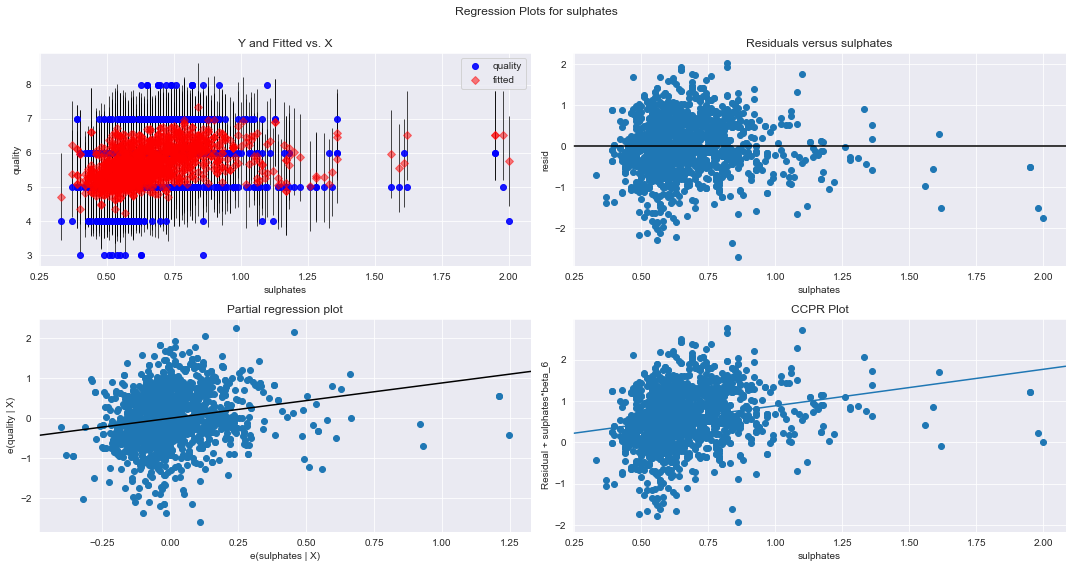

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sulphates", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means sulphates is Significant

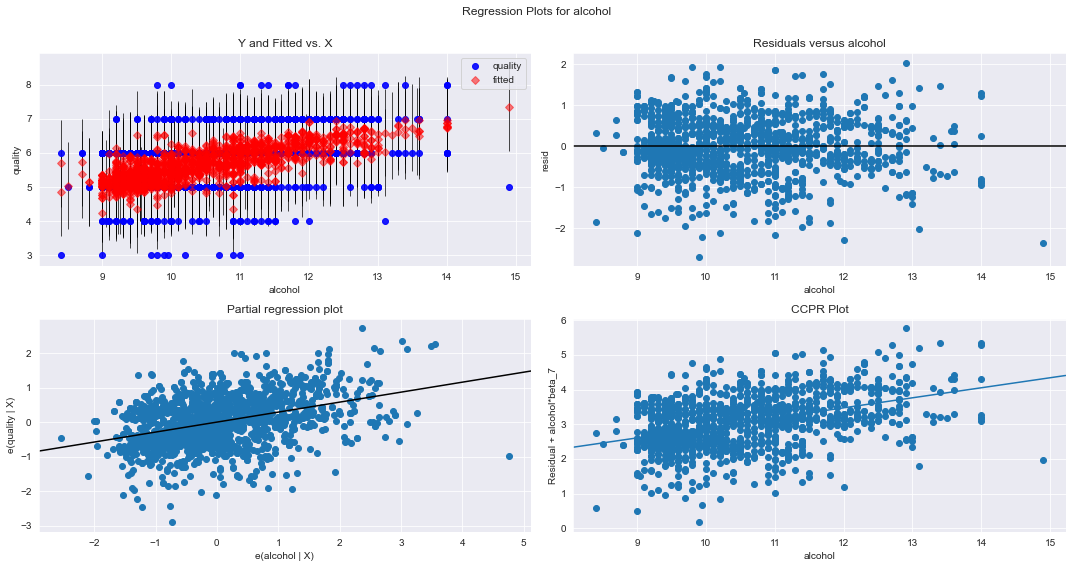

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "alcohol", fig=fig)
plt.show()

Inference: CCPR Plot has Scope Which means alcohol is Significant

### Model Deletion Diagnostics-- (Detecting Influencers/Outliers) -- Two Method

#### Cook’s Distance -- 1st Method (First Implementation)

In [32]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
w = model_influence.cooks_distance[0] 

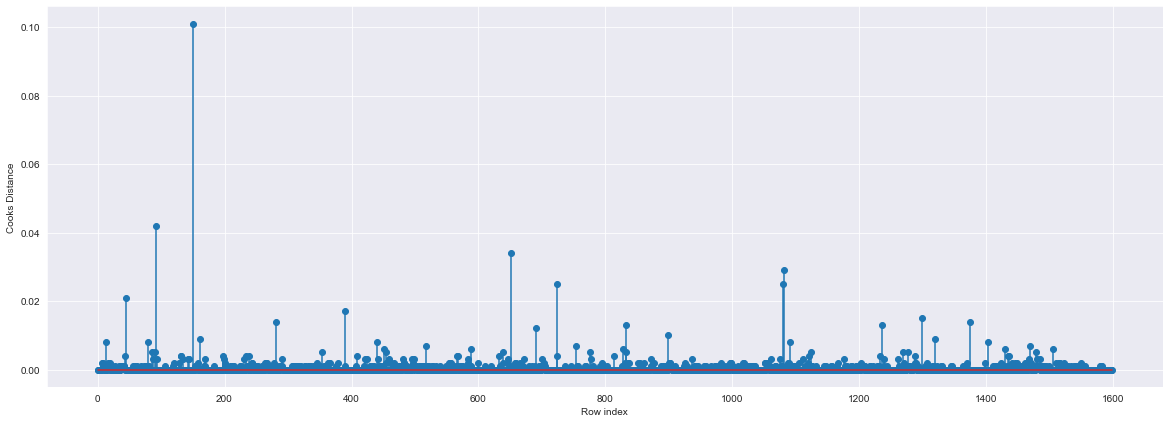

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset2)), np.round(w, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .5
(np.argmax(w),np.max(w))

(151, 0.10149695191124417)

#### High Influence points-- 2nd Method (1st implementation)

After the influnce Points is the outlier

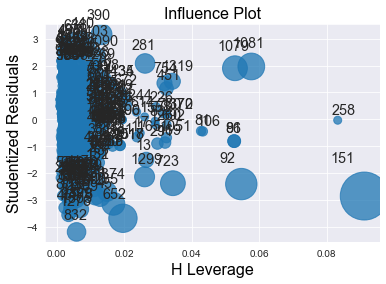

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset2.shape[1]   # K = no of rows
n = Dataset2.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage

0.016885553470919325

Inference: After 0.016 any Datapoint is a outlier, Considering 151 and 258 index datapoints as outlier

#### Comparing the Extreme Observations (Outlier)

In [37]:
# Getting the Values of observation From Cook and Hat Method
Dataset2[Dataset2.index.isin([151,258])]

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
151,0.52,0.610,32.0,69.0,2.74,2.00,9.4,4
258,0.41,0.611,8.0,45.0,3.06,1.26,9.4,5


In [38]:
#See the differences in HP and other variable values
Dataset2.head()

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


Inference: As We can see observation are Extreme

#### Improving the model --Deleting the outlier point

In [39]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset3=Dataset2.drop(Dataset2.index[[151,258]],axis=0).reset_index()

In [40]:
#Drop the original index
Dataset3=Dataset3.drop(['index'],axis=1)
Dataset3.head()

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


#### Build New Model after 1st Implementation of Cooks Distance And Leverage

In [41]:
#Build the model --4th Model
import statsmodels.formula.api as smf 
model = smf.ols('quality~volatile_acidity+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol',data=Dataset3).fit()

In [42]:
#4th Model R_square.
Fourth_R2 = (model.rsquared,model.rsquared_adj,model.aic)
Fourth_R2

(0.36086763513084363, 0.3580520740521249, 3146.827388609573)

In [43]:
#Checking R2 
if Third_R2[0]<Fourth_R2[0]:
    print("4th Model is Better as its R2",Fourth_R2[0],"is more then 3rd Model R2",Third_R2[0])
else:
    print("3rd Model is Better as its R2",Third_R2[0],"is more then 4th Model R2",Fourth_R2[0])

4th Model is Better as its R2 0.36086763513084363 is more then 3rd Model R2 0.35947091587233826


##### Inference : R_squared of 4th model is more than R_squared of 3rd model

#### 2nd Implementation of Cook Distance

In [44]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
w = model_influence.cooks_distance[0] 

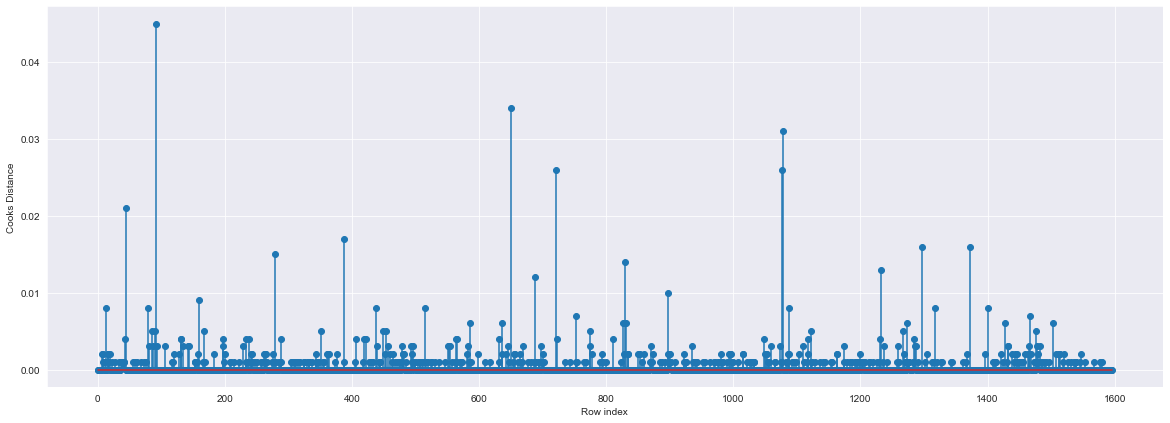

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset3)), np.round(w, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
#index and value of influencer where c is more than .5
(np.argmax(w),np.max(w))

(92, 0.04508087372710019)

#### High Influence points-- 2nd Method (2nd implementation)

After the influnce Points is the outlier

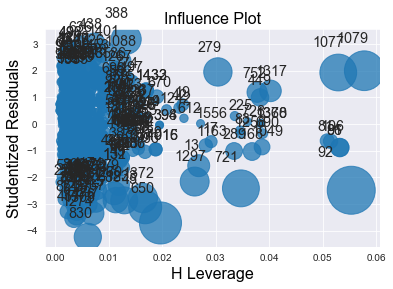

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [48]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset3.shape[1]   # K = no of rows
n = Dataset3.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage

0.016906700062617408

Inference: After 0.016 any Datapoint is a outlier, Considering 92,279,721,1077,1079 index datapoints as outlier

#### Improving the model --Deleting the outlier point

In [49]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset4=Dataset3.drop(Dataset3.index[[92,279,721,1077,1079]],axis=0).reset_index()

In [50]:
#Drop the original index
Dataset4=Dataset4.drop(['index'],axis=1)
Dataset4.head()

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


#### Build New Model after 2nd Implementation of Cooks Distance And Leverage

In [51]:
#Build the model --5th Model
import statsmodels.formula.api as smf 
model = smf.ols('quality~volatile_acidity+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol',data=Dataset4).fit()

In [52]:
#5th Model R_square.
Fifth_R2 = (model.rsquared,model.rsquared_adj,model.aic)
Fifth_R2

(0.36666899989002244, 0.3638701886521628, 3117.684522915311)

In [53]:
#Checking R2
if Fourth_R2[0]<Fifth_R2[0]:
    print("5th Model is Better as its R2",Fifth_R2[0],"is more then 4th Model R2",Fourth_R2[0])
else:
    print("4th Model is Better as its R2",Fourth_R2[0],"is more then 5th Model R2",Fifth_R2[0])

5th Model is Better as its R2 0.36666899989002244 is more then 4th Model R2 0.36086763513084363


#### 3rd Implementation of Cook Distance

In [54]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
w = model_influence.cooks_distance[0] 

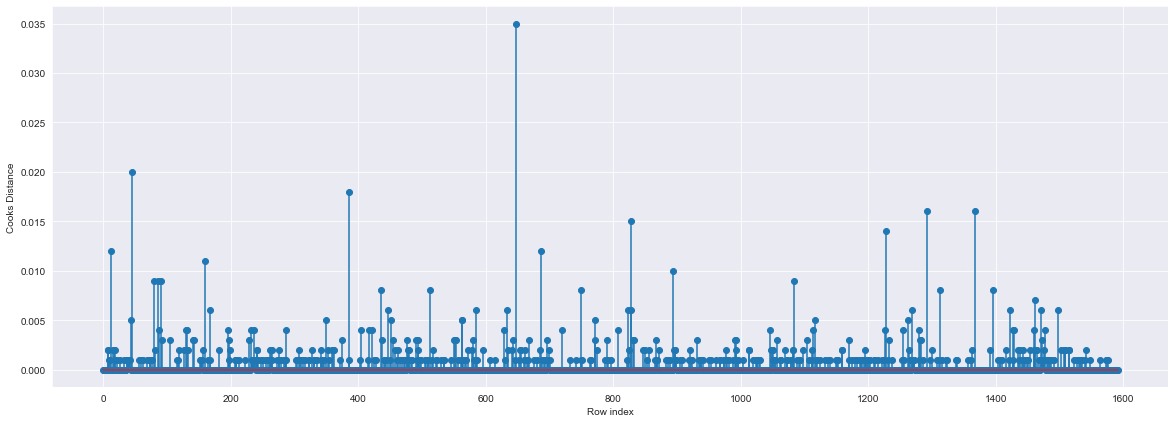

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset4)), np.round(w, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
#index and value of influencer where c is more than .5
(np.argmax(w),np.max(w))

(648, 0.035135729372972595)

#### High Influence points-- 2nd Method (3rd implementation)

After the influnce Points is the outlier

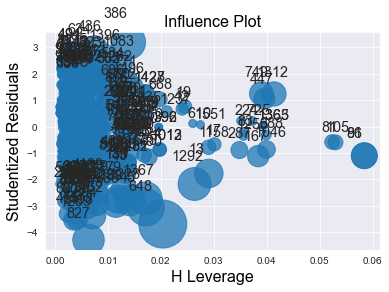

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [58]:
# 3*((k + 1)/n) -- Formula to determine Influnce / Leverage point
k = Dataset4.shape[1]   # K = no of rows
n = Dataset4.shape[0]   # n = no of columns
leverage = 3*((k + 1)/n)

leverage

0.016959798994974875

Inference: After 0.016 any Datapoint is a outlier, Considering 648,96,1292 index datapoints as outlier

#### Improving the model --Deleting the outlier point

In [59]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Dataset5=Dataset4.drop(Dataset4.index[[96,648,1292]],axis=0).reset_index()

In [60]:
#Drop the original index
Dataset5=Dataset5.drop(['index'],axis=1)
Dataset5.head()

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4,5


#### Build New Model after 3rd Implementation of Cooks Distance And Leverage

In [61]:
#Build the model --6th Model
import statsmodels.formula.api as smf 
model = smf.ols('quality~volatile_acidity+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol',data=Dataset5).fit()

In [62]:
#6th Model R_square.
Sixth_R2 = (model.rsquared,model.rsquared_adj,model.aic)
Sixth_R2

(0.36935895426217047, 0.36656674216845464, 3096.080998339417)

In [63]:
#Checking R2
if Fifth_R2[0]<Sixth_R2[0]:
    print("6th Model is Better as its R2",Sixth_R2[0],"is more then 5th Model R2",Fifth_R2[0])
else:
    print("5th Model is Better as its R2",Fifth_R2[0],"is more then 6th Model R2",Sixth_R2[0])

6th Model is Better as its R2 0.36935895426217047 is more then 5th Model R2 0.36666899989002244


#### 4th Implementation of Cook Distance

In [64]:
model_influence = model.get_influence()   # Gives Two Value, 1st is Cook distance And 2nd is its p_values 
w = model_influence.cooks_distance[0]

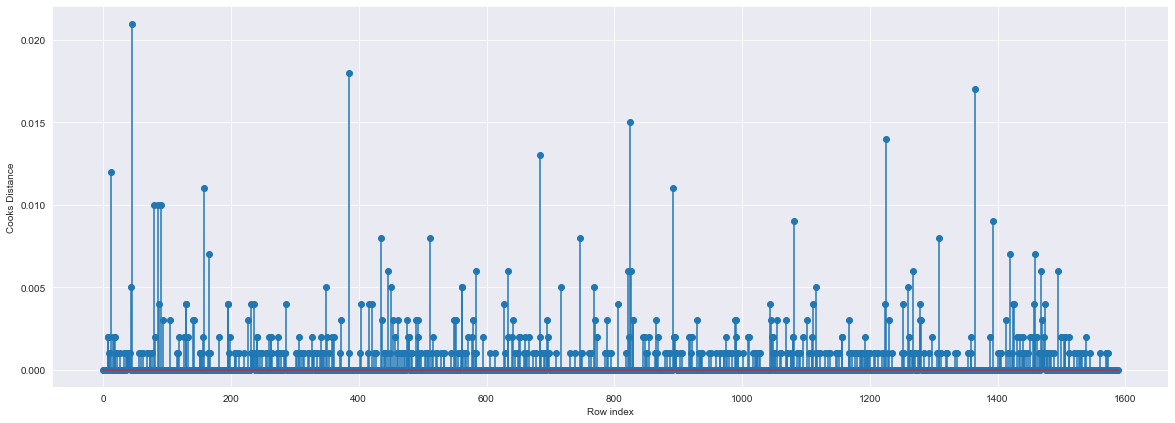

In [65]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Dataset5)), np.round(w, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [66]:
#index and value of influencer where c is more than .5
(np.argmax(w),np.max(w))

(45, 0.020686333578636047)

#### Inference: Now outlier is 2 index, but Since the value is <1 , we can stop the diagnostic process and finalize the model, Further diagnostic can be performed if needed to improve the model. but for Noth Sixth Model is the Final model

#### Predicting for new data

In [67]:
#New data for prediction
new_data=pd.DataFrame({'volatile_acidity':0.99,"chlorides":0.089,"free_sulfur_dioxide":19.0,"total_sulfur_dioxide":38.0,"pH":3.33,"sulphates":0.77,"alcohol":9.6},index=[1])
new_data

,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
1,0.99,0.089,19.0,38.0,3.33,0.77,9.6


In [74]:
model.predict(new_data)

1    5.128535
dtype: float64

Inference: Quality of the Wine Will be 5.12 for the given new Datapoint